In [4]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import itertools
from scipy.signal import convolve2d, correlate2d

In [5]:
img = cv2.imread('./source/100-4.jpg')
template = cv2.imread('./template/100-Template.jpg')

In [6]:
img_gray = img[:, :, 2]*0.299 + img[:, :, 1]*0.587 + img[:, :, 0]*0.114
img_gray = img_gray.astype(np.uint8)

template_gray = template[:, :, 2]*0.299 + template[:, :, 1]*0.587 + template[:, :, 0]*0.114
template_gray = template_gray.astype(np.uint8)

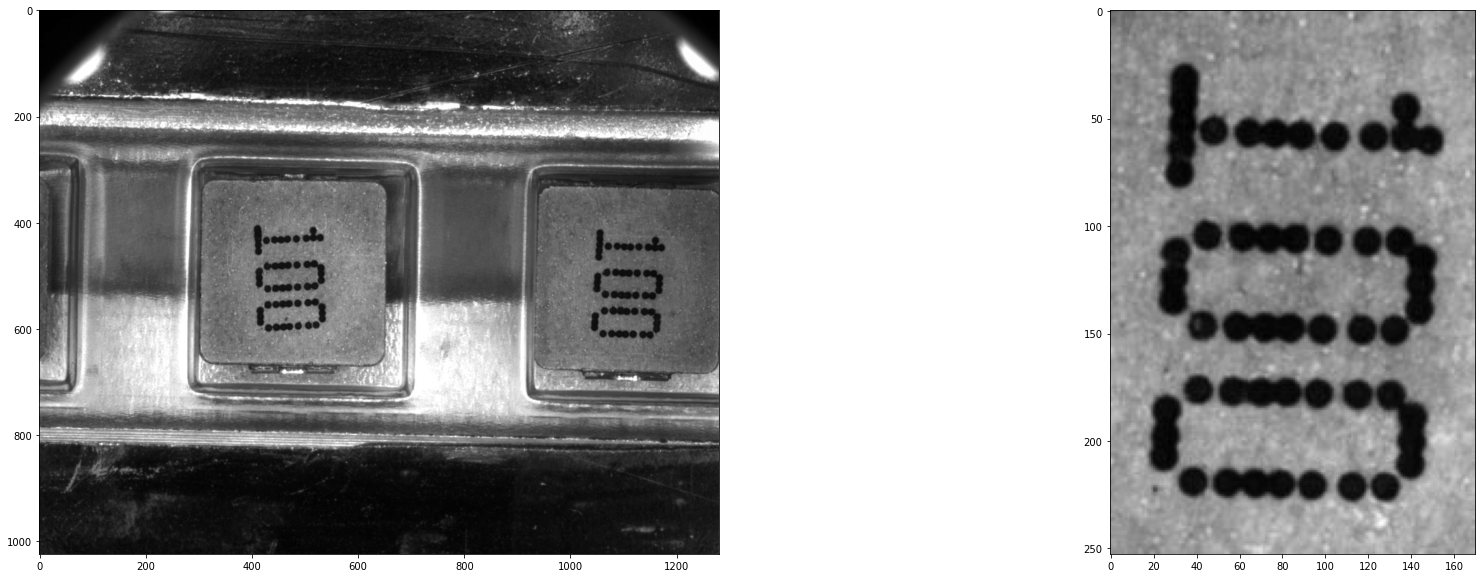

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
ax[0].imshow(img_gray, cmap='gray')
ax[1].imshow(template_gray, cmap='gray')

![](img/texureMatching公式.jpg)

In [ ]:
h, w = template_gray.shape
template_norm = template_gray - 1 / np.mean(template_gray)
img_norm = img_gray - 1 / np.mean(img_gray)

# with OpenCV

In [8]:
img = cv2.imread('./source/100-4.jpg')
template = cv2.imread('./template/100-Template.jpg')

In [9]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

In [10]:
res = cv2.matchTemplate(img_gray, template_gray, cv2.TM_CCOEFF_NORMED)

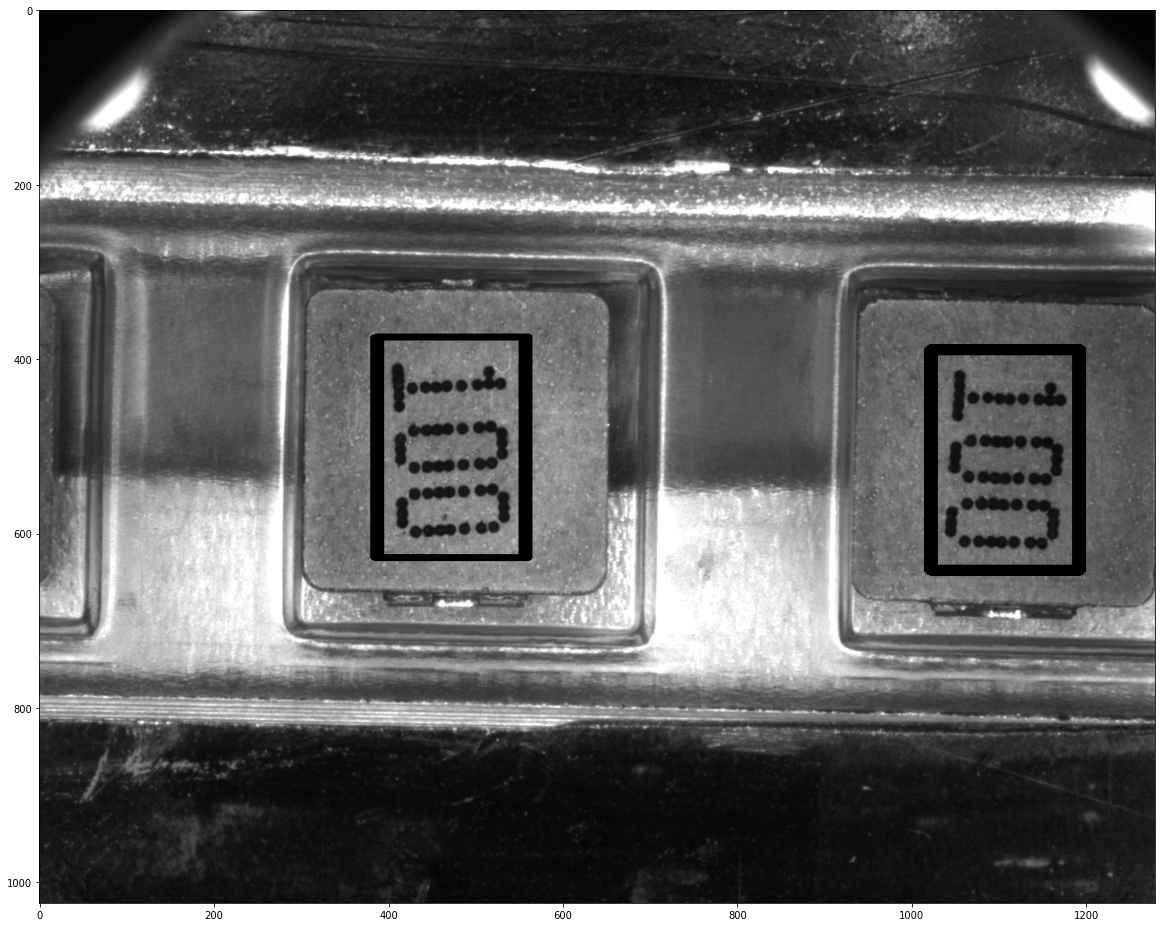

In [13]:
w, h = template_gray.shape[::-1]
img_res = img_gray.copy()

threshold = 0.6
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_res, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.figure(figsize=(20, 20))
plt.imshow(img_res, cmap='gray')